# Préparation des variables pour les variables d'activités 

In [1]:
library(tidyverse)
library(factoextra)

# Charger les données
df_pilot1_2022 <- readRDS("../../../data/qc2022/preparation_donnees/01_pilot1_2022.rds")

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.1     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.1
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [2]:
# Préparation du jeu de données pour les variables d'activités
variables_act <- c(
  "id",
  "act_Gym",
  "act_Walk",
  "act_Run",
  "act_Yoga",
  "act_Other",
  "act_None",
  "act_Fishing",
  "act_Hunting",
  "act_VisitsMuseumsGaleries",
  "act_MotorizedOutdoorActivities",
  "act_Volunteering"
)

df_act <- df_pilot1_2022 %>%
  select(all_of(variables_act))

In [3]:
# Tables
table(df_act$act_Gym)
table(df_act$act_Walk)
table(df_act$act_Run)
table(df_act$act_Yoga)
table(df_act$act_Other)
table(df_act$act_Non)
table(df_act$act_Fishing)
table(df_act$act_Hunting)
table(df_act$act_VisitsMuseumsGaleries)
table(df_act$act_MotorizedOutdoorActivities)
table(df_act$act_Volunteering)



   0    1 
1304  196 


  0   1 
551 949 


   0    1 
1364  136 


   0    1 
1401   99 


   0    1 
1237  263 


   0    1 
1284  216 


   0 0.25  0.5 0.75    1 
 968  230  221   60   21 


   0 0.25  0.5 0.75    1 
1294   76   74   40   16 


   0 0.25  0.5 0.75    1 
 407  421  556   98   18 


   0 0.25  0.5 0.75    1 
 996  239  180   65   20 


   0 0.25  0.5 0.75    1 
 611  348  366  110   65 

### Transformations

Transformer les variables avec nuance (0, 0.25, 0.5, 0.75, 1)

Comme les 1 sont peu nombreux, il semble avantageux de transformer les variables en 0, 0.5 et 1 où

- 0.25 est intégré à 0.5
- 0.75 est intégré à 1

In [4]:
df_act$act_Gym <- as.numeric(df_act$act_Gym)
df_act$act_Walk <- as.numeric(df_act$act_Walk)
df_act$act_Run <- as.numeric(df_act$act_Run)
df_act$act_Yoga <- as.numeric(df_act$act_Yoga)
df_act$act_Other <- as.numeric(df_act$act_Other)
df_act$act_None <- as.numeric(df_act$act_None)

In [5]:
df_act$act_Fishing <- ifelse(df_act$act_Fishing == 0.25, 0.5, ifelse(df_act$act_Fishing == 0.75, 1, df_act$act_Fishing))
df_act$act_Hunting <- ifelse(df_act$act_Hunting == 0.25, 0.5, ifelse(df_act$act_Hunting == 0.75, 1, df_act$act_Hunting))
df_act$act_VisitsMuseumsGaleries <- ifelse(df_act$act_VisitsMuseumsGaleries == 0.25, 0.5, ifelse(df_act$act_VisitsMuseumsGaleries == 0.75, 1, df_act$act_VisitsMuseumsGaleries))
df_act$act_MotorizedOutdoorActivities <- ifelse(df_act$act_MotorizedOutdoorActivities == 0.25, 0.5, ifelse(df_act$act_MotorizedOutdoorActivities == 0.75, 1, df_act$act_MotorizedOutdoorActivities))
df_act$act_Volunteering <- ifelse(df_act$act_Volunteering == 0.25, 0.5, ifelse(df_act$act_Volunteering == 0.75, 1, df_act$act_Volunteering))


In [6]:
str(df_act)

'data.frame':	1500 obs. of  12 variables:
 $ id                            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ act_Gym                       : num  0 0 0 0 1 0 0 0 0 1 ...
 $ act_Walk                      : num  1 1 1 1 0 1 1 0 1 0 ...
 $ act_Run                       : num  0 0 1 0 1 0 1 0 0 0 ...
 $ act_Yoga                      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ act_Other                     : num  1 0 0 0 0 0 0 0 0 0 ...
 $ act_None                      : num  0 0 0 0 0 0 0 1 0 0 ...
 $ act_Fishing                   : num  0.5 0 0 0 0 0 0 0 0 0 ...
 $ act_Hunting                   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ act_VisitsMuseumsGaleries     : num  0.5 0.5 1 0.5 0.5 0 0.5 0.5 0.5 0.5 ...
 $ act_MotorizedOutdoorActivities: num  0 0 0 0.5 0.5 0 0 0 0 0 ...
 $ act_Volunteering              : num  0.5 0.5 0 0.5 0.5 0.5 0 0.5 0 0.5 ...


In [7]:
table(df_act$act_Fishing)
table(df_act$act_Hunting)
table(df_act$act_VisitsMuseumsGaleries)
table(df_act$act_MotorizedOutdoorActivities)
table(df_act$act_Volunteering)


  0 0.5   1 
968 451  81 


   0  0.5    1 
1294  150   56 


  0 0.5   1 
407 977 116 


  0 0.5   1 
996 419  85 


  0 0.5   1 
611 714 175 

In [8]:
# Sauvegarder les données préparées
saveRDS(df_act, file = "../../../data/qc2022/preparation_donnees/02_pilot1_2022_act.rds")

---

### Activité de Clustering

Effectuer un exercice de clustering pour mieux saisir les données et leur relation. 

Cet exercice est purement exploratoire et sert à voir si les données peuvent être utilisées pour faire du clustering.

In [9]:
# 2. Exploration des données

# Aperçu et exploration initiale :

# Aperçu des données
head(df_act)

# Distribution des données pour chaque variable
# table(df_act[, -which(names(df_act) == "id")]) #Trop de combinaisons

# # Vérification des données manquantes
sum(is.na(df_act))

# # Statistiques descriptives
summary(df_act %>% select(-id))

,id,act_Gym,act_Walk,act_Run,act_Yoga,act_Other,act_None,act_Fishing,act_Hunting,act_VisitsMuseumsGaleries,act_MotorizedOutdoorActivities,act_Volunteering
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,1,0,0,1,0,0.5,0,0.5,0.0,0.5
2,2,0,1,0,0,0,0,0.0,0,0.5,0.0,0.5
3,3,0,1,1,0,0,0,0.0,0,1.0,0.0,0.0
4,4,0,1,0,0,0,0,0.0,0,0.5,0.5,0.5
5,5,1,0,1,0,0,0,0.0,0,0.5,0.5,0.5
6,6,0,1,0,0,0,0,0.0,0,0.0,0.0,0.5


[1] 0

    act_Gym          act_Walk         act_Run           act_Yoga    
 Min.   :0.0000   Min.   :0.0000   Min.   :0.00000   Min.   :0.000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.00000   1st Qu.:0.000  
 Median :0.0000   Median :1.0000   Median :0.00000   Median :0.000  
 Mean   :0.1307   Mean   :0.6327   Mean   :0.09067   Mean   :0.066  
 3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:0.00000   3rd Qu.:0.000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.00000   Max.   :1.000  
   act_Other         act_None      act_Fishing      act_Hunting     
 Min.   :0.0000   Min.   :0.000   Min.   :0.0000   Min.   :0.00000  
 1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:0.0000   1st Qu.:0.00000  
 Median :0.0000   Median :0.000   Median :0.0000   Median :0.00000  
 Mean   :0.1753   Mean   :0.144   Mean   :0.2043   Mean   :0.08733  
 3rd Qu.:0.0000   3rd Qu.:0.000   3rd Qu.:0.5000   3rd Qu.:0.00000  
 Max.   :1.0000   Max.   :1.000   Max.   :1.0000   Max.   :1.00000  
 act_VisitsMuseumsGaleries act_Mot

In [10]:
str(df_act)

'data.frame':	1500 obs. of  12 variables:
 $ id                            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ act_Gym                       : num  0 0 0 0 1 0 0 0 0 1 ...
 $ act_Walk                      : num  1 1 1 1 0 1 1 0 1 0 ...
 $ act_Run                       : num  0 0 1 0 1 0 1 0 0 0 ...
 $ act_Yoga                      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ act_Other                     : num  1 0 0 0 0 0 0 0 0 0 ...
 $ act_None                      : num  0 0 0 0 0 0 0 1 0 0 ...
 $ act_Fishing                   : num  0.5 0 0 0 0 0 0 0 0 0 ...
 $ act_Hunting                   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ act_VisitsMuseumsGaleries     : num  0.5 0.5 1 0.5 0.5 0 0.5 0.5 0.5 0.5 ...
 $ act_MotorizedOutdoorActivities: num  0 0 0 0.5 0.5 0 0 0 0 0 ...
 $ act_Volunteering              : num  0.5 0.5 0 0.5 0.5 0.5 0 0.5 0 0.5 ...


In [11]:
# # Détermination du nombre optimal de clusters

#df_scaled <- scale(df_act)
df_scaled <- df_act %>% select(-id)
head(df_scaled)

#table(df_act)

,act_Gym,act_Walk,act_Run,act_Yoga,act_Other,act_None,act_Fishing,act_Hunting,act_VisitsMuseumsGaleries,act_MotorizedOutdoorActivities,act_Volunteering
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,1,0,0,1,0,0.5,0,0.5,0.0,0.5
2,0,1,0,0,0,0,0.0,0,0.5,0.0,0.5
3,0,1,1,0,0,0,0.0,0,1.0,0.0,0.0
4,0,1,0,0,0,0,0.0,0,0.5,0.5,0.5
5,1,0,1,0,0,0,0.0,0,0.5,0.5,0.5
6,0,1,0,0,0,0,0.0,0,0.0,0.0,0.5


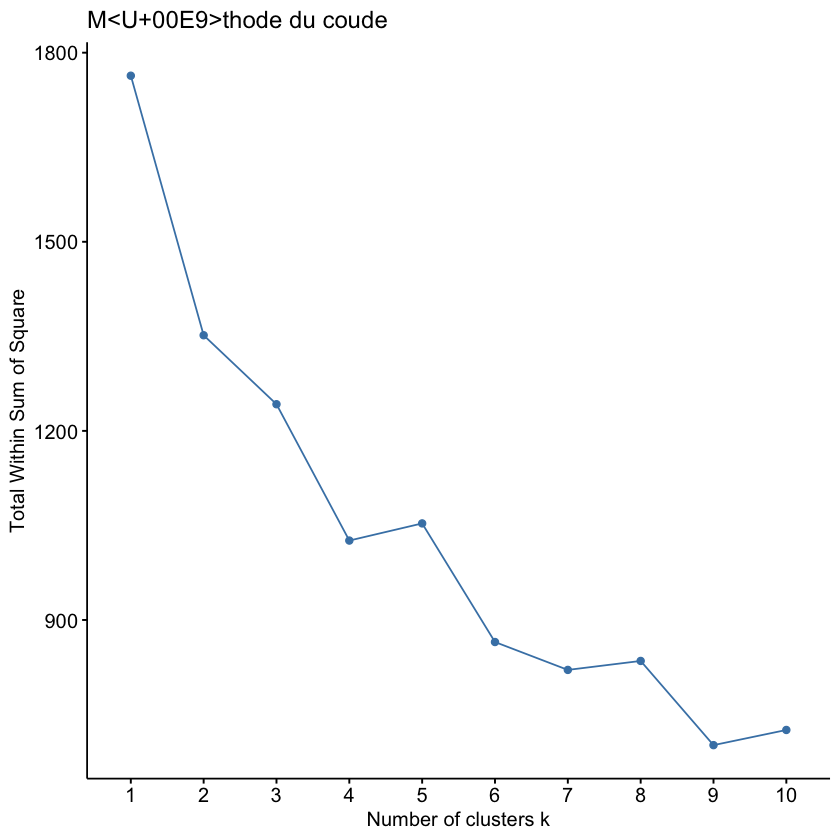

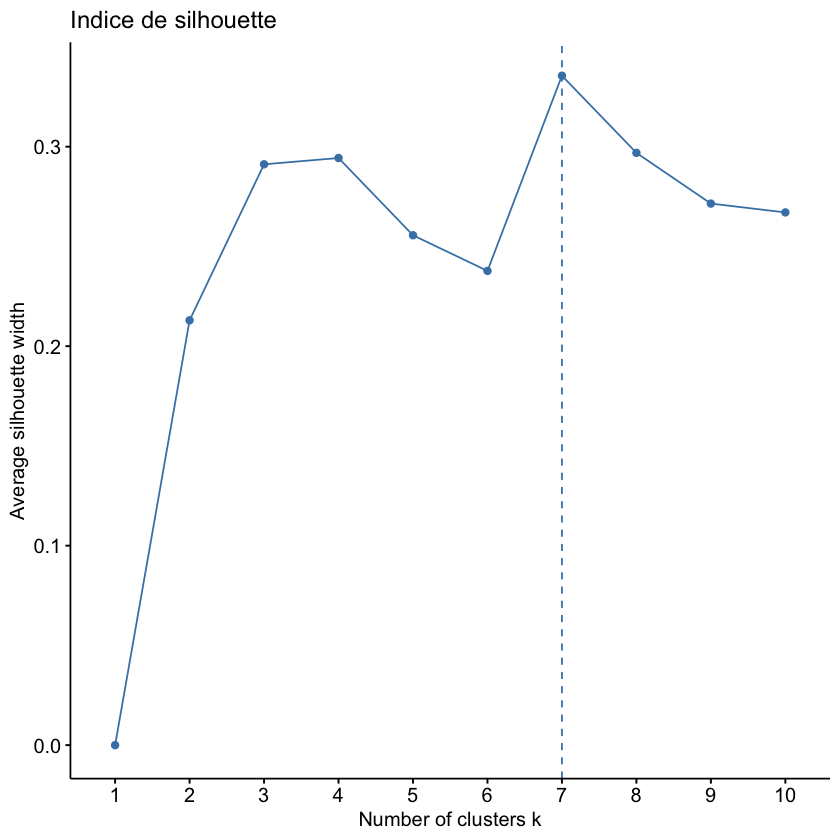

In [12]:
# Utilisons la méthode de l’élbow (coude) et l’indice de silhouette.

# Méthode du coude
fviz_nbclust(df_scaled, kmeans, method = "wss") +
  ggtitle("Méthode du coude")

# Indice de silhouette
fviz_nbclust(df_scaled, kmeans, method = "silhouette") +
  ggtitle("Indice de silhouette")

In [13]:
# Application de K-Means Clustering

# Choisissez un nombre de clusters approprié (par exemple, 3).
k <- 4

# K-Means Clustering
set.seed(123)  # Pour la reproductibilité
kmeans_result <- kmeans(df_scaled, centers = k, nstart = 25)

# Ajouter les clusters au dataframe original
df_act$cluster <- as.factor(kmeans_result$cluster)


In [14]:
# Visualisation des clusters

# head(df_act)
kmeans_result

K-means clustering with 4 clusters of sizes 733, 289, 216, 262

Cluster means:
    act_Gym  act_Walk    act_Run  act_Yoga   act_Other act_None act_Fishing
1 0.0000000 1.0000000 0.06684857 0.0627558 0.000000000        0   0.2094134
2 0.6228374 0.2906574 0.24567474 0.1245675 0.003460208        0   0.2508651
3 0.0000000 0.0000000 0.00000000 0.0000000 0.000000000        1   0.1435185
4 0.0610687 0.5038168 0.06106870 0.0648855 1.000000000        0   0.1889313
  act_Hunting act_VisitsMuseumsGaleries act_MotorizedOutdoorActivities
1  0.08117326                 0.4188267                      0.2019100
2  0.12802768                 0.4567474                      0.2491349
3  0.05092593                 0.2453704                      0.1111111
4  0.08969466                 0.4293893                      0.1927481
  act_Volunteering
1        0.3669850
2        0.3771626
3        0.2430556
4        0.3874046

Clustering vector:
   [1] 4 1 1 1 2 1 1 3 1 2 2 2 1 2 1 3 1 4 4 1 1 1 4 1 1 2 2 1 2 3 4 1 

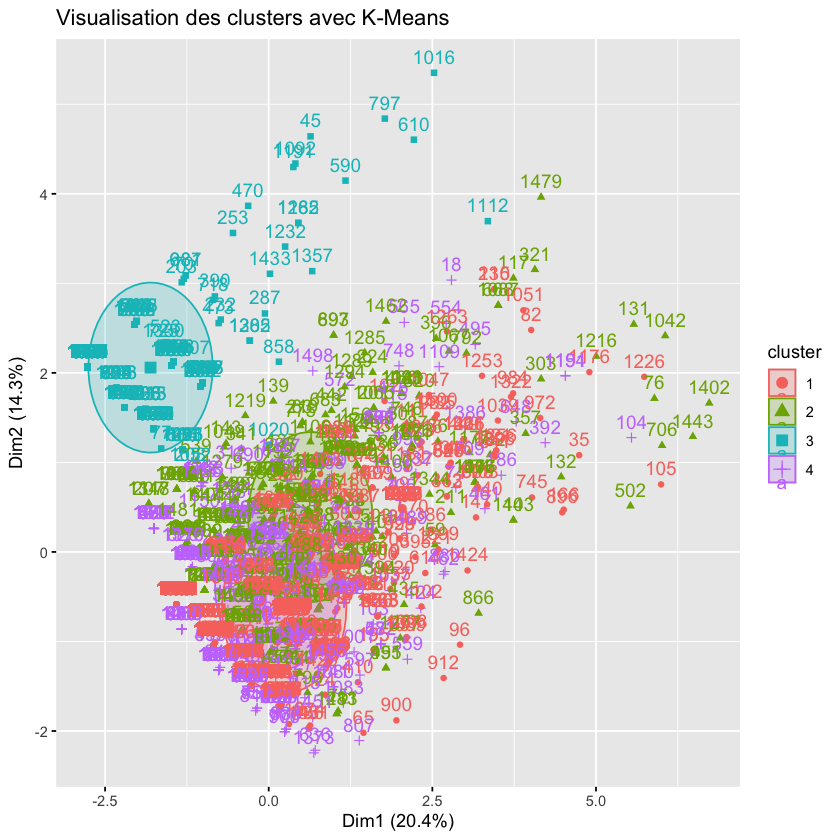

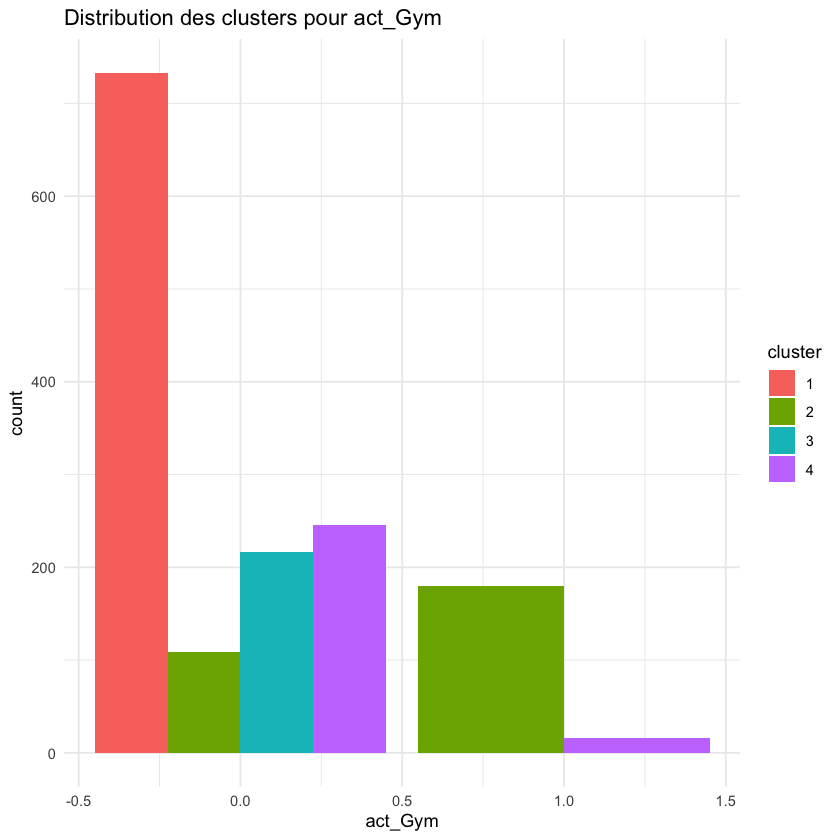

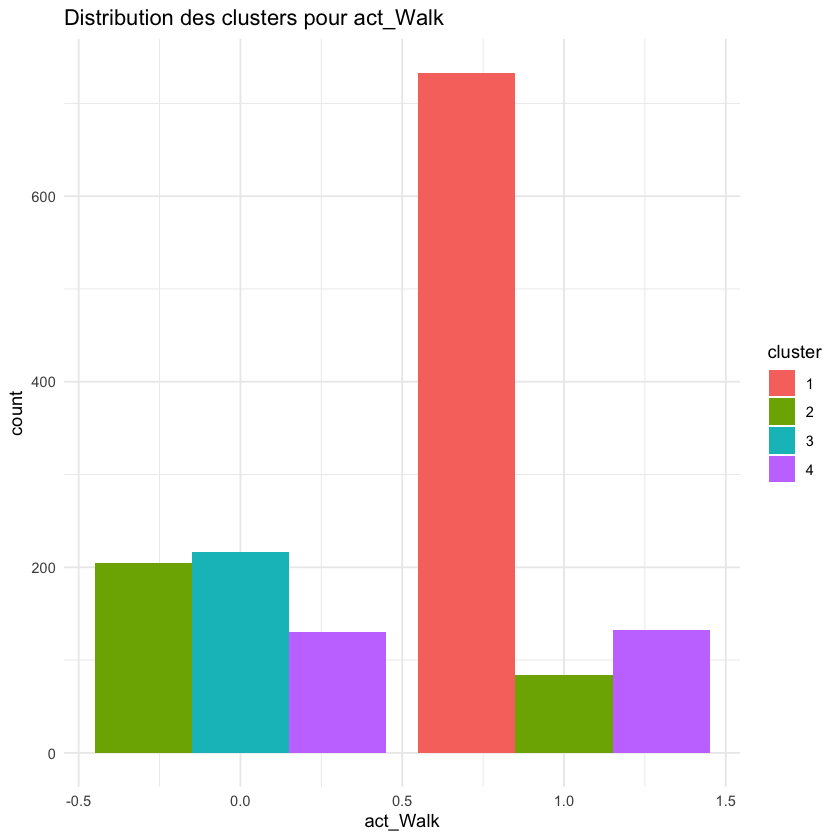

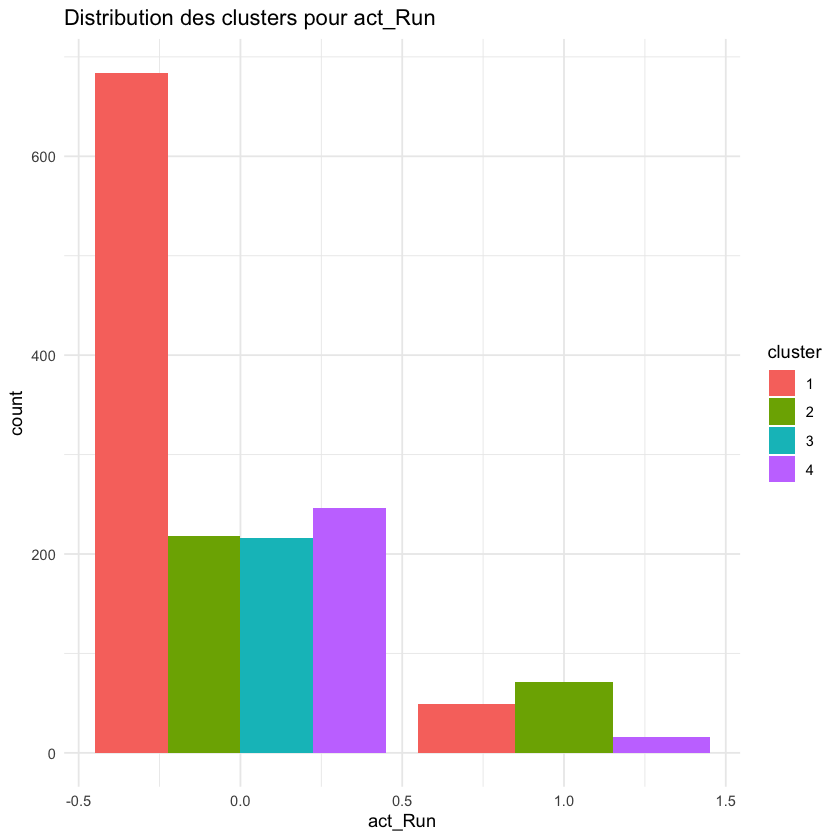

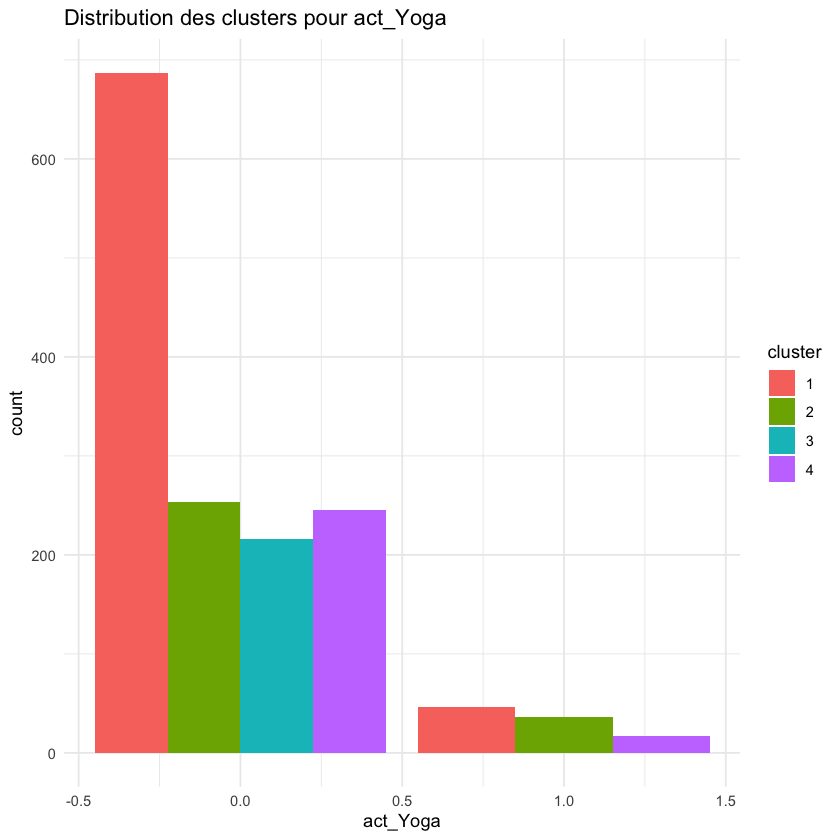

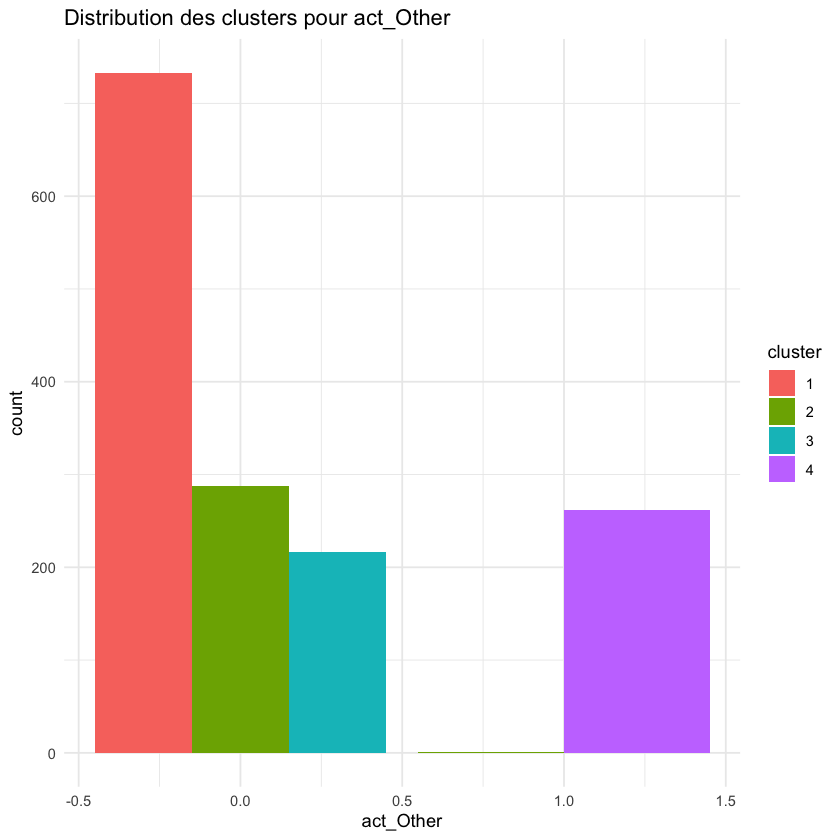

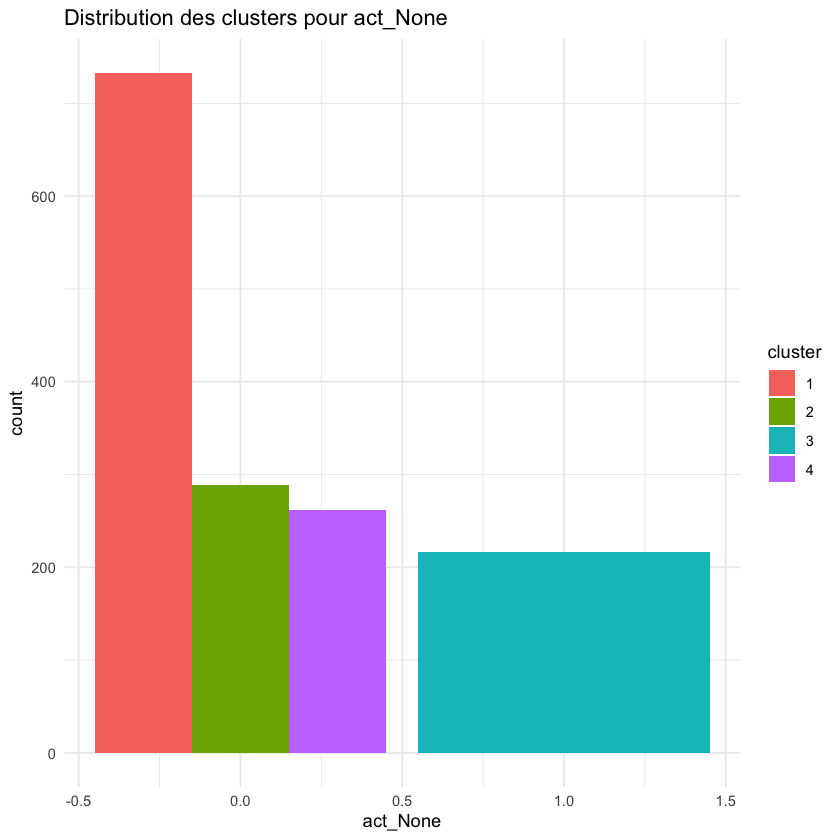

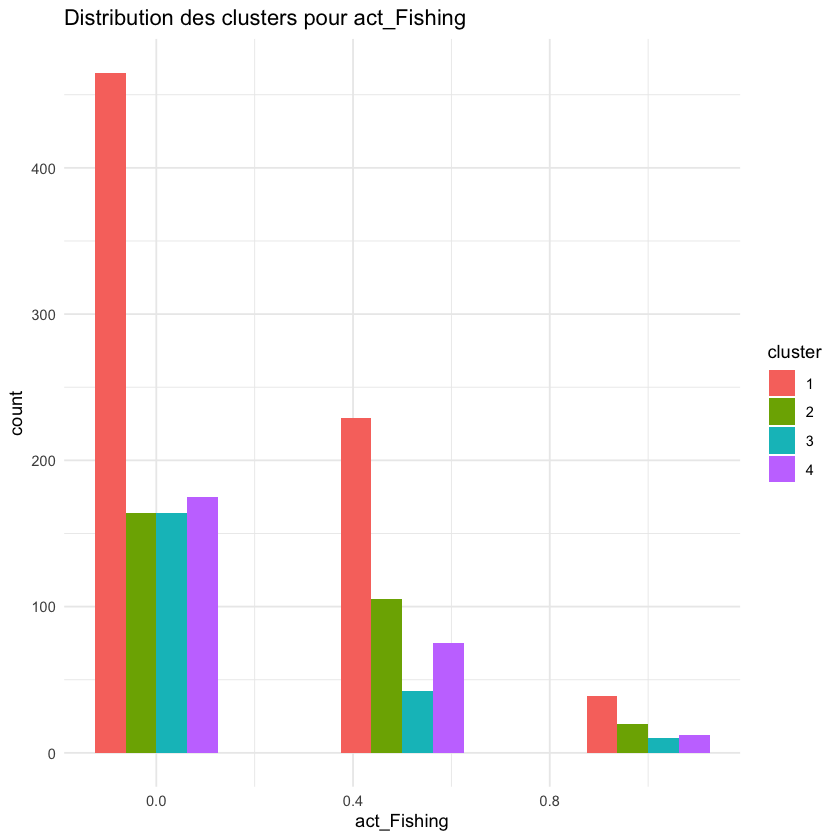

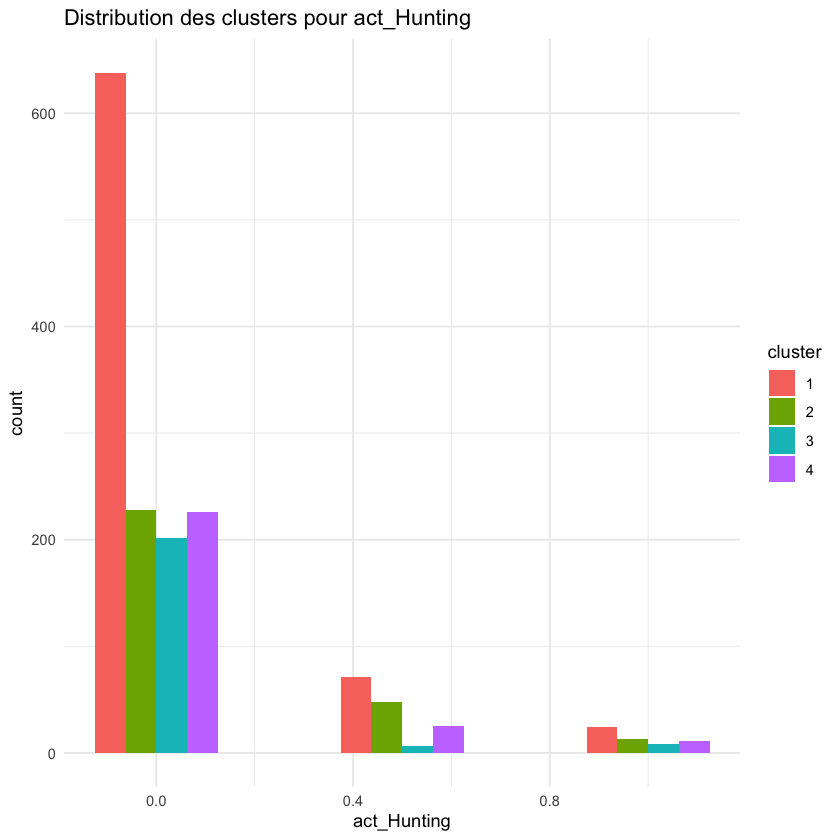

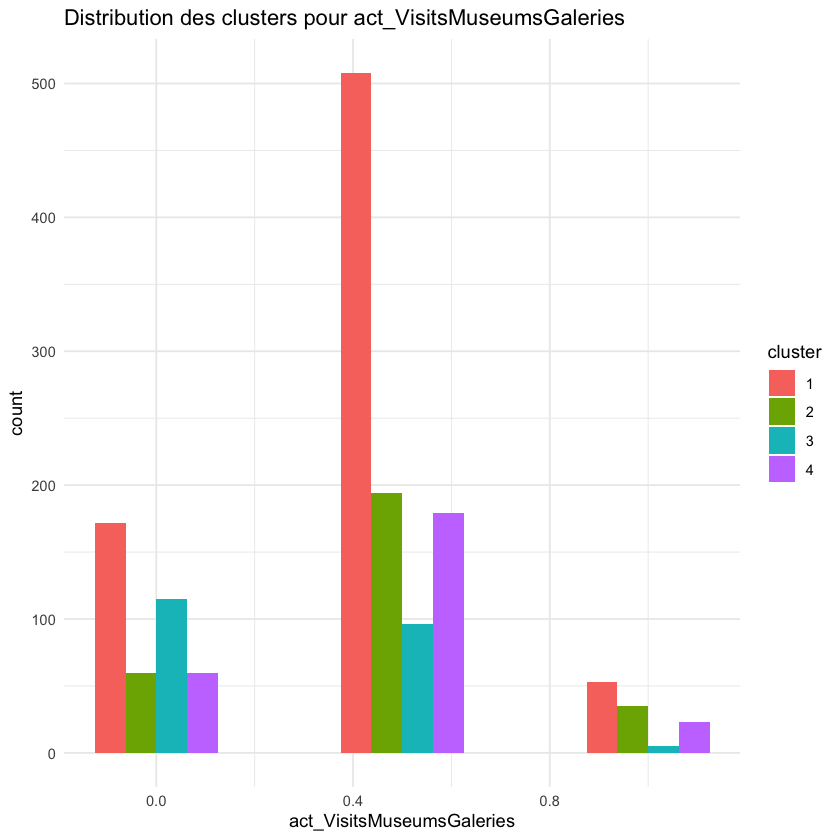

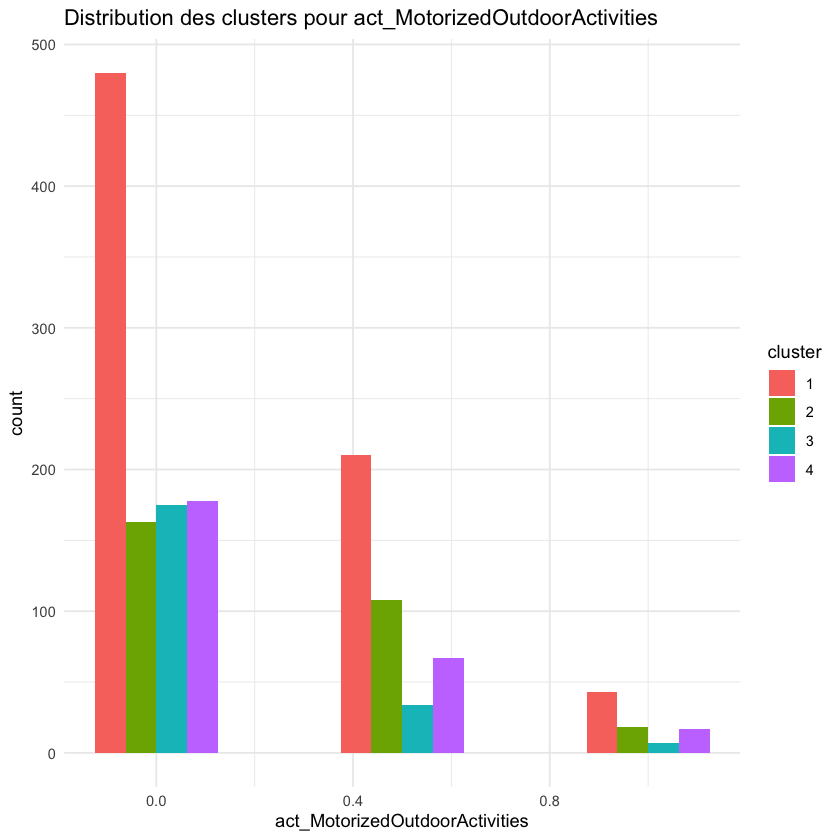

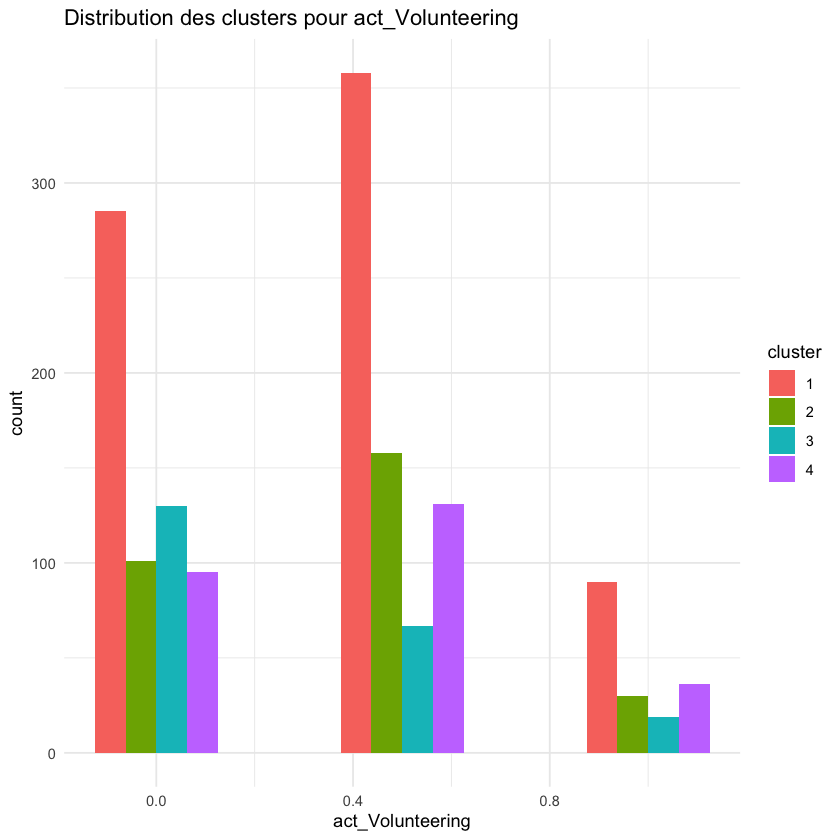

In [15]:
# Visualisation des clusters

# Visualisation des clusters dans l’espace des deux premières dimensions :

# Utilisation de factoextra pour représenter les clusters
fviz_cluster(kmeans_result, data = df_scaled, ellipse.type = "euclid") +
  ggtitle("Visualisation des clusters avec K-Means")

# Graphique par variables

# Variables binaires
g_var_bin <- function(df, var) {
  # Distribution des clusters par var
  g <- ggplot(df, aes(x = .data[[var]], fill = cluster)) +
    geom_bar(position = "dodge") +
    ggtitle(paste("Distribution des clusters pour", var)) +
    theme_minimal()
  return(g)
}
g_var_bin(df_act, "act_Gym")
g_var_bin(df_act, "act_Walk")
g_var_bin(df_act, "act_Run")
g_var_bin(df_act, "act_Yoga")
g_var_bin(df_act, "act_Other")
g_var_bin(df_act, "act_None")

# Variables nuancées
g_var_nuancee <- function(df, var) {
  # Distribution des clusters par var
  g <- ggplot(df, aes(x = .data[[var]], fill = cluster)) +
    geom_histogram(binwidth = 0.25, position = "dodge") +
    ggtitle(paste("Distribution des clusters pour", var)) +
    theme_minimal()
  return(g)
}
g_var_nuancee(df_act, "act_Fishing")
g_var_nuancee(df_act, "act_Hunting")
g_var_nuancee(df_act, "act_VisitsMuseumsGaleries")
g_var_nuancee(df_act, "act_MotorizedOutdoorActivities")
g_var_nuancee(df_act, "act_Volunteering")

# # Distribution des clusters par `cons_Smoke_few_times_day`
# ggplot(df_act, aes(x = cons_Smoke_few_times_day, fill = cluster)) +
#   geom_bar(position = "dodge") +
#   ggtitle("Distribution des clusters pour cons_Smoke_few_times_day") +
#   theme_minimal()